In [6]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [2]:
#Carregar bando de dados
dataset = pd.read_excel("pzt2.xlsx", header=None)

display(dataset)

,0,1,2,3,4,5,6,7,8,9,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970
0,30000.0,162.179,162.080,162.019,162.019,162.019,162.069,162.069,162.118,162.019,...,186.107,186.107,186.163,186.051,186.051,186.265,186.321,186.265,186.051,186.016
1,30010.0,164.697,164.647,164.697,164.537,164.537,164.588,164.537,164.638,164.537,...,188.648,188.648,188.705,188.648,188.648,188.648,188.806,188.806,188.591,188.389
2,30020.0,167.906,167.906,167.906,167.957,167.906,167.957,167.906,168.009,167.744,...,191.525,191.525,191.684,191.684,191.684,191.684,191.684,191.684,191.467,191.367
3,30030.0,171.637,171.583,171.583,171.637,171.583,171.637,171.637,171.690,171.473,...,195.126,195.185,195.126,195.126,195.126,195.185,195.285,195.285,195.126,194.749
4,30040.0,174.364,174.364,174.364,174.364,174.141,174.197,174.141,174.252,174.197,...,200.095,200.033,200.095,200.095,200.095,200.095,200.254,200.095,200.033,199.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,69960.0,662.970,662.970,663.175,663.997,664.409,663.586,663.586,664.616,666.062,...,778.363,778.081,778.081,778.081,777.798,778.081,778.081,778.646,780.348,783.488
3996,69970.0,664.822,665.028,665.235,666.269,666.477,665.855,665.855,666.892,668.140,...,776.670,776.389,776.389,776.670,776.107,776.670,776.670,776.952,779.213,782.915
3997,69980.0,658.891,659.094,659.906,660.721,661.332,660.721,660.517,661.332,662.970,...,771.912,771.634,771.634,771.634,771.356,771.634,771.634,772.190,774.984,779.780
3998,69990.0,652.867,653.066,653.464,654.463,654.863,654.263,654.263,655.063,656.670,...,763.656,763.112,763.112,763.384,762.840,763.384,763.384,763.929,767.212,772.747


In [3]:
#Tratamento do banco de dados - Transpor dados
data = dataset.T

display(data)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,30000.000,30010.000,30020.000,30030.000,30040.000,30050.000,30060.000,30070.000,30080.000,30090.000,...,69910.000,69920.000,69930.000,69940.000,69950.000,69960.000,69970.000,69980.000,69990.000,70000.000
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [4]:
#Tratamento do banco de dados - Remover linha da frequencia
new_data = data.drop([0], axis=0)

display(new_data)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [7]:
#Aplicando PCA no banco de dados
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(new_data)
principalDf = pd.DataFrame(data= principalComponents)

display(principalDf)

,0,1
0,-3757.321769,-2506.468672
1,-3764.218235,-2507.132629
2,-3758.148909,-2506.991646
3,-3757.018323,-2507.569697
4,-3753.454942,-2507.360926
...,...,...
2965,4498.793827,-3110.722421
2966,4498.274936,-3109.967169
2967,4501.164031,-3107.487505
2968,4521.506774,-3093.920713


In [8]:
#Definindo dados de treinamento
X_train = principalDf.iloc[0: 660]

display(X_train)

,0,1
0,-3757.321769,-2506.468672
1,-3764.218235,-2507.132629
2,-3758.148909,-2506.991646
3,-3757.018323,-2507.569697
4,-3753.454942,-2507.360926
...,...,...
655,5340.674138,-3426.271245
656,5335.562659,-3425.819520
657,5330.406593,-3425.528513
658,5348.506169,-3407.681393


In [9]:
#Definindo dados de teste
X_test = principalDf.iloc[660: 2970]

display(X_test)

,0,1
660,-3735.333706,-2368.615620
661,-3744.728973,-2385.313554
662,-3748.265277,-2397.217455
663,-3748.551349,-2406.915688
664,-3750.666364,-2413.813543
...,...,...
2965,4498.793827,-3110.722421
2966,4498.274936,-3109.967169
2967,4501.164031,-3107.487505
2968,4521.506774,-3093.920713


In [10]:
#Aplicando Isolation forest nos dados de treinamento
clf = IsolationForest()
clf.fit(X_train)

IsolationForest()

In [11]:
#Predições dos dados
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Text(0, 0.5, 'Dim. 2')

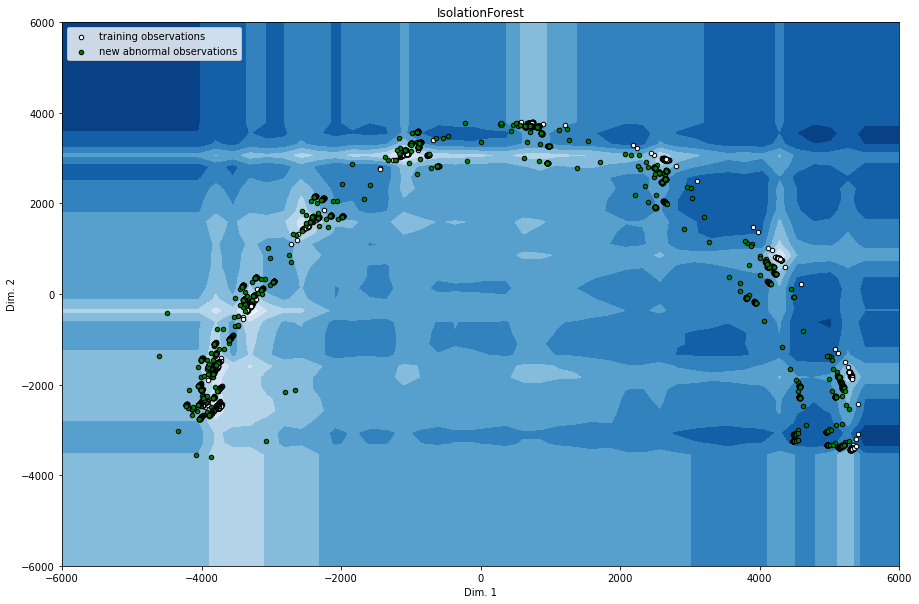

In [17]:
#Plot dos resultados
xx, yy = np.meshgrid(np.linspace(-6000, 6000, 50), np.linspace(-6000, 6000, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,10))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[0], X_train[1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[0], X_test[1], c="green", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-6000, 6000))
plt.ylim((-6000, 6000))
plt.legend(
    [b1, b2],
    ["training observations", "new abnormal observations"],
    loc="upper left",
)

plt.xlabel("Dim. 1")
plt.ylabel("Dim. 2")

In [23]:
#Identificação de anomalia
n_error_test = y_pred_test[y_pred_test == -1].size

print("Outliers identificados: ", n_error_test)

Outliers identificados:  2273


In [24]:
#Identificação da condição natural
n_error_train = y_pred_train[y_pred_train == 1].size

print("Inliers identificados: ", n_error_train)

Inliers identificados:  420
